<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [1]:
# insert code here
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras

print("Keras version: ", keras.__version__)
print("Tensorflow version: ", tf.__version__)


Bad key "text.kerning_factor" on line 4 in
C:\Users\britn\anaconda3\envs\iod\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


Keras version:  2.10.0
Tensorflow version:  2.10.0


### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [2]:
# insert code here
diabetes = load_diabetes()

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Prepare input data

In [4]:
# insert code here
# the input
X = diabetes.data

# The type of X to check that it is a numpy array
print("X is a ", type(X))

# The shape to check rows and columns
print("X has {} rows and {} columns".format(X.shape[0], X.shape[1]))

# Save number of columns as n_cols
n_cols = X.shape[1]

# the output
y = diabetes.target

print("First 10 values in y: ", y[:10])

X is a  <class 'numpy.ndarray'>
X has 442 rows and 10 columns
First 10 values in y:  [151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


In [5]:
y.shape

(442,)

### Split the data (training/test)

In [6]:
# insert code here
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 65)

### Create the model's architecture

In [7]:
# insert code here
# Set up the model architecture
model = Sequential()

In [8]:
# Add the first hidden layer
model.add(Dense(15, activation = 'relu', input_shape = (n_cols, )))
# Add the second hidden layer
model.add(Dense(5, activation = 'relu'))
# Add the output layer
model.add(Dense(1, activation = 'linear'))

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                165       
                                                                 
 dense_1 (Dense)             (None, 5)                 80        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

In [12]:
# insert code here
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse'])

### Fit the training data

In [13]:
%%time
# insert code here
from sklearn.utils import shuffle
X_train2, y_train2 = shuffle(X_train, y_train, random_state=42)

Wall time: 0 ns


In [14]:
# Fit the model
history = model.fit(
    X_train2,
    y_train2,
    validation_split = 0.25,
    batch_size = 10,
    epochs = 1000,
    verbose = 1)

Epoch 1/1000
24/24 [==============================] - 1s 9ms/step - loss: 28715.6152 - mse: 28715.6152 - val_loss: 28048.4297 - val_mse: 28048.4297
Epoch 2/1000
24/24 [==============================] - 0s 2ms/step - loss: 28653.4980 - mse: 28653.4980 - val_loss: 27969.6406 - val_mse: 27969.6406
Epoch 3/1000
24/24 [==============================] - 0s 2ms/step - loss: 28562.0059 - mse: 28562.0039 - val_loss: 27861.4590 - val_mse: 27861.4590
Epoch 4/1000
24/24 [==============================] - 0s 2ms/step - loss: 28439.9844 - mse: 28439.9844 - val_loss: 27722.1699 - val_mse: 27722.1699
Epoch 5/1000
24/24 [==============================] - 0s 2ms/step - loss: 28281.0254 - mse: 28281.0254 - val_loss: 27539.6660 - val_mse: 27539.6660
Epoch 6/1000
24/24 [==============================] - 0s 2ms/step - loss: 28076.9082 - mse: 28076.9141 - val_loss: 27312.7461 - val_mse: 27312.7461
Epoch 7/1000
24/24 [==============================] - 0s 2ms/step - loss: 27824.0820 - mse: 27824.0820 - val_los

### Create predictions

In [15]:
# insert code here
predictions = model.predict(X_test)

5/5 [==============================] - 0s 751us/step


In [16]:
predictions

array([[176.93521 ],
       [190.38116 ],
       [172.12466 ],
       [229.73473 ],
       [193.96725 ],
       [264.25662 ],
       [153.90492 ],
       [ 67.77985 ],
       [150.7989  ],
       [169.92542 ],
       [215.0117  ],
       [194.77791 ],
       [ 93.20543 ],
       [227.37709 ],
       [ 89.26558 ],
       [225.67683 ],
       [ 84.83751 ],
       [123.20421 ],
       [134.34358 ],
       [158.77788 ],
       [ 81.79042 ],
       [ 79.318436],
       [195.78497 ],
       [120.25329 ],
       [233.61241 ],
       [188.72047 ],
       [123.346695],
       [ 94.78471 ],
       [184.36234 ],
       [228.69696 ],
       [224.45923 ],
       [226.08699 ],
       [166.57277 ],
       [117.10006 ],
       [128.24048 ],
       [158.67073 ],
       [106.468925],
       [233.57196 ],
       [208.31227 ],
       [126.9341  ],
       [ 95.87944 ],
       [122.766396],
       [184.12991 ],
       [229.92323 ],
       [139.34303 ],
       [270.7257  ],
       [151.75749 ],
       [202.6

### Evaluate the model

In [17]:
# insert code here
# Calculate test MSE
score = model.evaluate(X_test, y_test)
print('\nTest loss: %.6f' % score[0])

5/5 [==============================] - 0s 751us/step - loss: 3301.5696 - mse: 3301.5696

Test loss: 3301.569580


In [18]:
score

[3301.569580078125, 3301.569580078125]

In [19]:
# Find RMSE
score[0] ** (1/2)

57.459286282359315

In [23]:
y.mean()

152.13348416289594

In [24]:
y.std()

77.00574586945044

In [25]:
y.min()

25.0

In [26]:
y.max()

346.0

### Visualisation of cost

In [27]:
# insert code here
history.history

{'loss': [28715.615234375,
  28653.498046875,
  28562.005859375,
  28439.984375,
  28281.025390625,
  28076.908203125,
  27824.08203125,
  27502.71875,
  27122.65234375,
  26675.888671875,
  26163.50390625,
  25577.728515625,
  24904.333984375,
  24179.90234375,
  23350.54296875,
  22475.552734375,
  21498.896484375,
  20455.291015625,
  19373.1484375,
  18263.8125,
  17128.888671875,
  15975.3720703125,
  14799.220703125,
  13681.876953125,
  12573.16796875,
  11540.515625,
  10577.4033203125,
  9678.2255859375,
  8818.4970703125,
  8064.97119140625,
  7370.763671875,
  6754.39599609375,
  6263.64208984375,
  5827.9521484375,
  5480.70556640625,
  5219.654296875,
  5006.3349609375,
  4832.9853515625,
  4698.0439453125,
  4586.9208984375,
  4487.376953125,
  4416.7392578125,
  4355.72314453125,
  4308.337890625,
  4251.119140625,
  4219.36083984375,
  4181.4443359375,
  4144.7763671875,
  4115.4208984375,
  4091.099365234375,
  4064.49072265625,
  4043.331787109375,
  4014.83154296875,

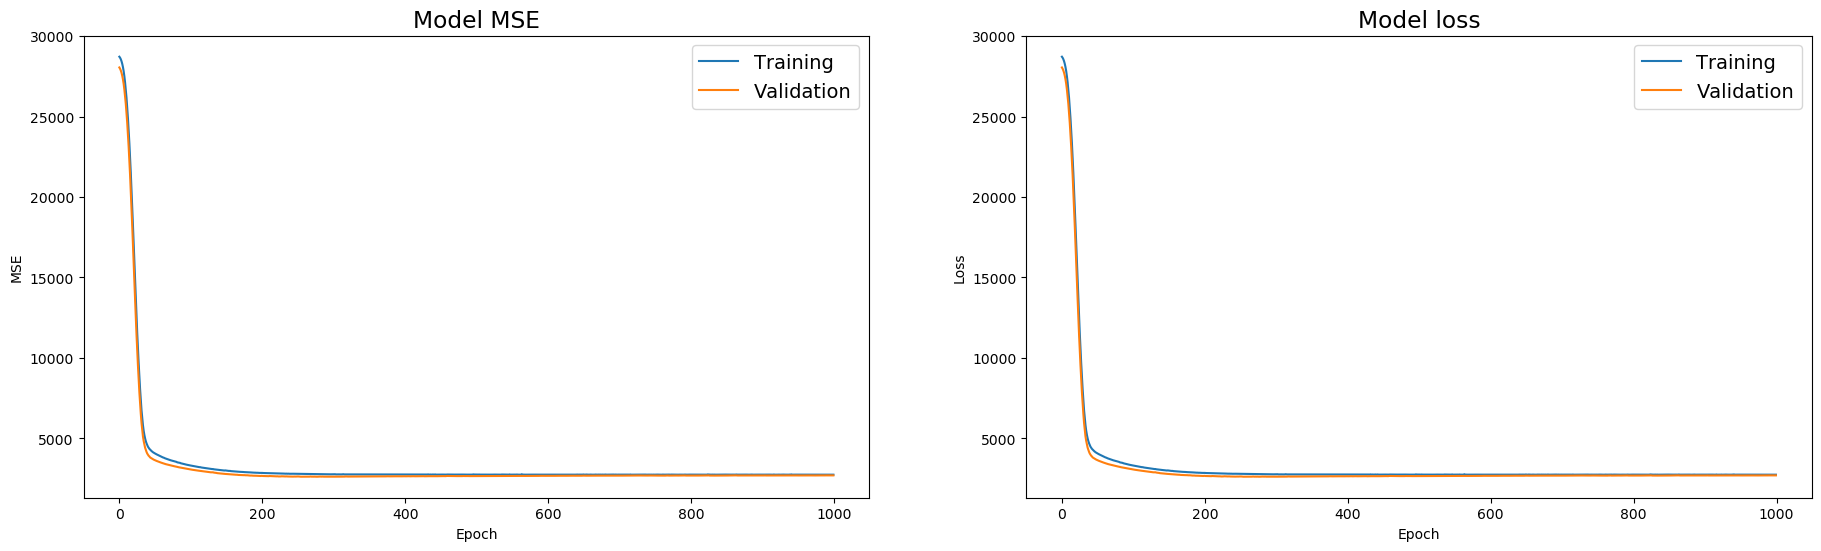

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 14})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [29]:
# insert code here
# Calculate R2 and adjusted R2
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

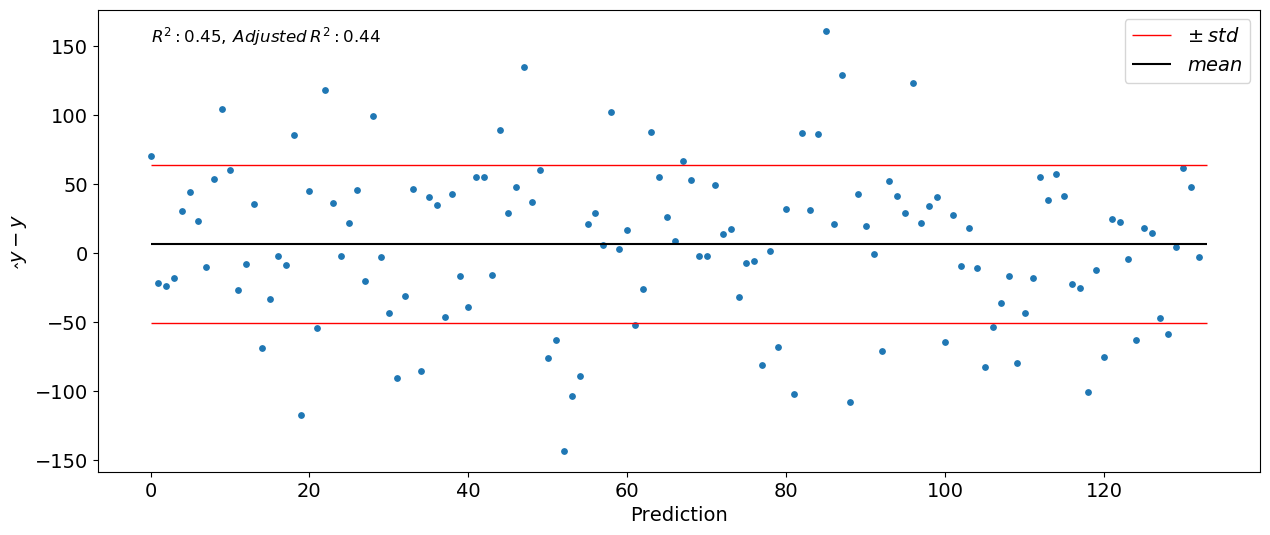

In [30]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



